___________________________________________________________________________________________________________
# Introduction to Pytorch 
### (based on the [60 min blitz Deep Learning with Pytorch] (https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html) )

## 1. Tensors
## 2. A Gentle Introduction to ``torch.autograd``
## 3. Neural Networks
## 4. Train a Classifier

_____________________________________________________________________________________________________

PyTorch is a Python-based scientific computing package serving two broad purposes:

- A replacement for NumPy to use the power of GPUs and other accelerators.
- An automatic differentiation library that is useful to implement neural networks.

Goal of this tutorial:

 - Understand PyTorch’s Tensor library and neural networks at a high level.
 - Train a small neural network to classify images

### NOTE:
The 4 sessions can be run independently, so if you feel confident with the first sessions you can quickly cover them. However, for the last session *4. Train a Classifier* you are expected to complete some empty cells to successfully train and test your `net`. 
_____________________________________________________________________________________________________

# 1. Tensors
--------------------------------------------

Tensors are a specialized data structure that are very similar to arrays
and matrices. In PyTorch, we use tensors to encode the inputs and
outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on
GPUs or other specialized hardware to accelerate computing. If you’re familiar with ndarrays, you’ll
be right at home with the Tensor API. If not, follow along in this quick
API walkthrough.


In [2]:
pip install torch

     -------------------------------------- 159.8/159.8 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 5.7/5.7 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 13.5 MB/s eta 0:00:00
     -------------------------------------- 172.0/172.0 kB 1.7 MB/s eta 0:00:00
     -------------------------------------- 228.5/228.5 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 14.0 MB/s eta 0:00:00
     -------------------------------------- 286.4/286.4 kB 5.9 MB/s eta 0:00:00
     ------------------------------------- 536.2/536.2 kB 11.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!python.exe -m pip install --upgrade pip

     ---------------------------------------- 2.1/2.1 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import torch
import numpy as np

### Tensor Initialization


Tensors can be initialized in various ways. Take a look at the following examples:

**Directly from data**

Tensors can be created directly from data. The data type is automatically inferred.



In [3]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)

**From a NumPy array**

Tensors can be created from NumPy arrays (and vice versa - see *bridge-to-np-label*).



In [4]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

**From another tensor:**

The new tensor retains the properties (shape, datatype) of the argument tensor, unless explicitly overridden.



In [5]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.8869, 0.6828],
        [0.2097, 0.7802]]) 



**With random or constant values:**

*shape* is a tuple of tensor dimensions. In the functions below, it determines the dimensionality of the output tensor.



In [6]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.0403, 0.5577, 0.1419],
        [0.8267, 0.6540, 0.5435]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


### Tensor Attributes


Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [7]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


### Tensor Operations


Over 100 tensor operations, including transposing, indexing, slicing,
mathematical operations, linear algebra, random sampling, and more are
comprehensively described [here](https://pytorch.org/docs/stable/torch.html).

Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.



**Standard numpy-like indexing and slicing:**



In [9]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Joining tensors** You can use *torch.cat* to concatenate a sequence of tensors along a given dimension.
See also [torch.stack] (https://pytorch.org/docs/stable/generated/torch.stack.html),
another tensor joining operation that is subtly different from *torch.cat*.



In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


**Multiplying tensors**



In [11]:
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


This computes the matrix multiplication between two tensors



In [12]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


**In-place operations**
Operations that have a `_` suffix are in-place. For example: `x.copy_(y)`, ``x.t_()``, will change ``x``.



In [13]:
print(tensor, "\n")
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


### NOTE

n-place operations save some memory, but can be problematic when computing derivatives because of an immediate loss
     of history. Hence, their use is discouraged.</p></div>



**Bridge to NumPy**

Tensor to NumPy array




In [14]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


A change in the tensor reflects in the NumPy array.



In [15]:
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


NumPy array to Tensor



In [16]:
n = np.ones(5)
t = torch.from_numpy(n)

Changes in the NumPy array reflects in the tensor.



In [17]:
np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]



# 2. A Gentle Introduction to ``torch.autograd``
---------------------------------

``torch.autograd`` is PyTorch’s automatic differentiation engine that powers
neural network training. In this section, you will get a conceptual
understanding of how autograd helps a neural network train.

### Background

Neural networks (NNs) are a collection of nested functions that are
executed on some input data. These functions are defined by *parameters*
(consisting of weights and biases), which in PyTorch are stored in
tensors.

Training a NN happens in two steps:

**Forward Propagation**: In forward prop, the NN makes its best guess
about the correct output. It runs the input data through each of its
functions to make this guess.

**Backward Propagation**: In backprop, the NN adjusts its parameters
proportionate to the error in its guess. It does this by traversing
backwards from the output, collecting the derivatives of the error with
respect to the parameters of the functions (*gradients*), and optimizing
the parameters using gradient descent. For a more detailed walkthrough
of backprop, check out this [video from
3Blue1Brown] (https://www.youtube.com/watch?v=tIeHLnjs5U8).




### Usage in PyTorch

Let's take a look at a single training step.
For this example, we load a pretrained resnet18 model from ``torchvision``.
We create a random data tensor to represent a single image with 3 channels, and height & width of 64,
and its corresponding ``label`` initialized to some random values.



In [11]:
import torch, torchvision
model = torchvision.models.resnet18(pretrained=True)
data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1, 1000)

Next, we run the input data through the model through each of its layers to make a prediction.
This is the **forward pass**.


In [12]:
prediction = model(data) # forward pass

We use the model's prediction and the corresponding label to calculate the error (*loss*).
The next step is to backpropagate this error through the network.
Backward propagation is kicked off when we call ``.backward()`` on the error tensor.
Autograd then calculates and stores the gradients for each model parameter in the parameter's ``.grad`` attribute.


In [13]:
loss = (prediction - labels).sum()
loss.backward() # backward pass

Next, we load an optimizer, in this case stochastic gradient descent **SGD** with a learning rate of 0.01 and momentum of 0.9.
We register all the parameters of the model in the optimizer.

Finally, we call ``.step()`` to initiate gradient descent. The optimizer adjusts each parameter by its gradient stored in ``.grad``.



In [14]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
optim.step() #gradient descent

## Differentiation in Autograd

Let's take a look at how ``autograd`` collects gradients. We create two tensors ``a`` and ``b`` with
``requires_grad=True``. This signals to ``autograd`` that every operation on them should be tracked.




In [15]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

We create another tensor ``Q`` from ``a`` and ``b``.

\begin{align}Q = 3a^3 - b^2\end{align}


In [16]:
Q = 3*a**3 - b**2

Let's assume ``a`` and ``b`` to be parameters of an NN, and ``Q``
to be the error. In NN training, we want gradients of the error
w.r.t. parameters, i.e.

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}


When we call ``.backward()`` on ``Q``, autograd calculates these gradients
and stores them in the respective tensors' ``.grad`` attribute.

We need to explicitly pass a ``gradient`` argument in ``Q.backward()`` because it is a vector.
``gradient`` is a tensor of the same shape as ``Q``, and it represents the
gradient of Q w.r.t. itself, i.e.

\begin{align}\frac{dQ}{dQ} = 1\end{align}



In [17]:
external_grad = torch.tensor([1., 1.])

Q.backward(gradient=external_grad)
# Gradients are now deposited in ``a.grad`` and ``b.grad``

# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


## Computational Graph


Conceptually, autograd keeps a record of data (tensors) & all executed
operations (along with the resulting new tensors) in a directed acyclic
graph (DAG) consisting of [Function] (https://pytorch.org/docs/stable/autograd.html#torch.autograd.Function)
objects. In this DAG, leaves are the input tensors, roots are the output
tensors. By tracing this graph from roots to leaves, you can
automatically compute the gradients using the chain rule.

In a forward pass, autograd does two things simultaneously:

- run the requested operation to compute a resulting tensor, and
- maintain the operation’s *gradient function* in the DAG.

The backward pass kicks off when ``.backward()`` is called on the DAG
root. ``autograd`` then:

- computes the gradients from each ``.grad_fn``,
- accumulates them in the respective tensor’s ``.grad`` attribute, and
- using the chain rule, propagates all the way to the leaf tensors.


** NOTE: DAGs are dynamic in PyTorch**
  An important thing to note is that the graph is recreated from scratch; after each
  ``.backward()`` call, autograd starts populating a new graph. This is
  exactly what allows you to use control flow statements in your model;
  you can change the shape, size and operations at every iteration if
  needed.</p></div>


### Exclusion from the DAG


``torch.autograd`` tracks operations on all tensors which have their
``requires_grad`` flag set to ``True``. For tensors that don’t require
gradients, setting this attribute to ``False`` excludes it from the
gradient computation DAG.

The output tensor of an operation will require gradients even if only a
single input tensor has ``requires_grad=True``.

In [18]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients? : {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients? : False
Does `b` require gradients?: True


In a NN, parameters that don't compute gradients are usually called **frozen parameters**.
It is useful to "freeze" part of your model if you know in advance that you won't need the gradients of those parameters
(this offers some performance benefits by reducing autograd computations).

Another common usecase where exclusion from the DAG is important is for transfer learning (see
[finetuning a pretrained network](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html))

In transfer learning, we freeze most of the model and typically only modify the classifier layers (last fully connected layers) to make predictions on new labels.
Let's walk through a small example to demonstrate this. As before, we load a pretrained resnet18 model, and freeze all the parameters.

In [19]:
from torch import nn, optim

model = torchvision.models.resnet18(pretrained=True)

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

Let's say we want to finetune the model on a new dataset with 10 labels.
In resnet, the classifier is the last linear layer ``model.fc``.
We can simply replace it with a new linear layer (unfrozen by default)
that acts as our classifier.



In [20]:
model.fc = nn.Linear(512, 10)

Now all parameters in the model, except the parameters of ``model.fc``, are frozen.
The only parameters that compute gradients are the weights and bias of ``model.fc``.
This means also that during traininig, the only parameters that are computing gradients (and hence updated in gradient descent)
are the weights and bias of the classifier (`model.fc`).

### NOTE:
 The same exclusionary functionality is available as a context manager in
[`torch.no_grad()`] (https://pytorch.org/docs/stable/generated/torch.no_grad.html), that we will be using for *Transfer Learning*



# 3. Neural Networks
_________________________________________________________________________________

Neural networks can be constructed using the ``torch.nn`` package.

Now that you had a glimpse of ``autograd``, ``nn`` depends on
``autograd`` to define models and differentiate them.
An ``nn.Module`` contains layers, and a method ``forward(input)`` that
returns the ``output``.

A neural network takes the input, feeds it through several layers one after the other, and then finally gives the
output.

A typical training procedure for a neural network is as follows:

- Define the neural network that has some learnable parameters (or
  weights)
- Iterate over a dataset of inputs
- Process input through the network
- Compute the loss (how far is the output from being correct)
- Propagate gradients back into the network’s parameters
- Update the weights of the network, typically using a simple update rule:

\begin{align}weight = weight - learningRate * gradient\end{align}

Define the network
------------------

Let’s define this network:


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension, 16 for channels
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


You just have to define the ``forward`` function, and the ``backward``
function (where gradients are computed) is automatically defined for you
using ``autograd``.
You can use any of the Tensor operations in the ``forward`` function.

The learnable parameters of a model are returned by ``net.parameters()``

In [22]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


Let's try a random 32x32 input.
Note: expected input size of this net (LeNet) is 32x32. To use this net on
the MNIST dataset, please resize the images from the dataset to 32x32.

In [23]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0425,  0.0688,  0.1283, -0.0018,  0.0368, -0.0631, -0.0309, -0.0521,
          0.0731, -0.0537]], grad_fn=<AddmmBackward>)


Zero the gradient buffers of all parameters and backprops with random
gradients:

In [24]:
net.zero_grad()
out.backward(torch.randn(1, 10))

### NOTE: 
`torch.nn` only supports mini-batches. The entire `torch.nn`
    package only supports inputs that are a mini-batch of samples, and not
    a single sample. 
    
For example, `nn.Conv2d` will take in a 4D Tensor of `nSamples x nChannels x Height x Width`.

If you have a single sample, just use `input.unsqueeze(0)` to add a fake batch dimension.
    __________________________________________________________________________________________________

Before proceeding further, let's recap all the classes you’ve seen so far.

**Recap:**
  -  ``torch.Tensor`` - A *multi-dimensional array* with support for autograd
     operations like ``backward()``. Also *holds the gradient* w.r.t. the
     tensor.
  -  ``nn.Module`` - Neural network module. *Convenient way of
     encapsulating parameters*, with helpers for moving them to GPU,
     exporting, loading, etc.
  -  ``nn.Parameter`` - A kind of Tensor, that is *automatically
     registered as a parameter when assigned as an attribute to a*
     ``Module``.
  -  ``autograd.Function`` - Implements *forward and backward definitions
     of an autograd operation*. Every ``Tensor`` operation creates at
     least a single ``Function`` node that connects to functions that
     created a ``Tensor`` and *encodes its history*.

**At this point, we covered:**
  -  Defining a neural network
  -  Processing inputs and calling backward

**Still Left:**
  -  Computing the loss
  -  Updating the weights of the network

## Loss Function

A loss function takes the (output, target) pair of inputs, and computes a
value that estimates how far away the output is from the target.

There are several different
[loss functions] (https://pytorch.org/docs/nn.html#loss-functions)  under the
nn package.
A simple loss is: ``nn.MSELoss`` which computes the mean-squared error
between the input and the target.

For example:



In [25]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.7360, grad_fn=<MseLossBackward>)


Now, if you follow ``loss`` in the backward direction, using its
``.grad_fn`` attribute, you will see a graph of computations that looks
like this:

::

    input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
          -> view -> linear -> relu -> linear -> relu -> linear
          -> MSELoss
          -> loss

So, when we call ``loss.backward()``, the whole graph is differentiated
w.r.t. the loss, and all Tensors in the graph that has ``requires_grad=True``
will have their ``.grad`` Tensor accumulated with the gradient.

For illustration, let us follow a few steps backward:

In [26]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

Backprop
--------
To backpropagate the error all we have to do is to ``loss.backward()``.
You need to clear the existing gradients though, else gradients will be
accumulated to existing gradients.


Now we shall call ``loss.backward()``, and have a look at conv1's bias
gradients before and after the backward.


In [27]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0278,  0.0115,  0.0097, -0.0079, -0.0034, -0.0042])


Now, we have seen how to use loss functions.

**Read Later:**

  The neural network package contains various modules and loss functions
  that form the building blocks of deep neural networks. A full list with
  documentation is [here] (https://pytorch.org/docs/nn).

**The only thing left to learn is:**

  - Updating the weights of the network

Update the weights
------------------
The simplest update rule used in practice is the Stochastic Gradient
Descent (SGD):

\begin{align}weight = weight - learningRate * gradient\end{align}

We can implement this using simple Python code:


    learning_rate = 0.01
    for f in net.parameters():
        f.data.sub_(f.grad.data * learning_rate)

However, as you use neural networks, you want to use various different
update rules such as SGD, Nesterov-SGD, Adam, RMSProp, etc.
To enable this, we built a small package: ``torch.optim`` that
implements all these methods. Using it is very simple:

In [28]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01) 

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

You have seen how to define neural networks, compute loss and make updates to the weights of the network.
One thing is still missing:

## Input Data


Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

This is it. You are finally ready to:

# 4. Train a Classifier!
____________________________________________________________________________________________________
We will do the following steps in order:

a. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``

b. Define a Convolutional Neural Network

c. Define a loss function

d. Train the network on the training data

e. Test the network on the test data


## a. Loading and normalizing CIFAR10


Using ``torchvision``, it’s extremely easy to load CIFAR10.



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are PILImage images of range `[0, 1]`.
We transform them to Tensors of normalized range `[-1, 1]`.


In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:09<00:00, 17849500.83it/s]


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


### NOTE:
If running on Windows you get a BrokenPipeError, try setting
    the num_worker of `torch.utils.data.DataLoader()` to 0.
    _______________________________________________________________________

Let us show some of the training images, for fun.


batch size: 4
color channels : 3
Image size:32x32


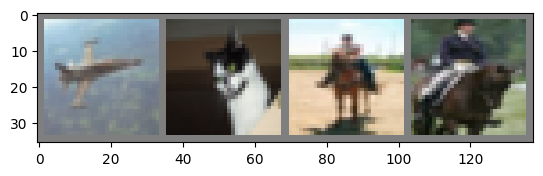

plane	   cat	 horse	 horse	


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Obtenir un lot aléatoire d'images d'entraînement et vérifier la taille
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Utiliser next() pour obtenir le prochain élément de l'itérateur
print('batch size:', images.size(0))
print('color channels :', images.size(1))
print('Image size:'+ str(images.size(2))+ 'x'+ str(images.size(3)))

# Afficher les images
imshow(torchvision.utils.make_grid(images))
# Afficher les étiquettes
print(' '.join('%5s\t' % classes[labels[j]] for j in range(4)))


## b. Define a Convolutional Neural Network

Copy the neural network from the Neural Networks section before and modify it to
take 3-channel (color) images, instead of 1-channel (black and white) images as it was defined.

### NOTE:
Pay attention to the in/out features dimensions, especially at the transition between a Convolution (Conv) and Fully connected (fc) linear layer

**Recap:**

Formula to get the output features size `h_out` of a 2D Conv layer given `h_in` (size features input), `k` (convolutional kernel size), `p` (zero padding), and `s` (stride) (more details in [Conv2D documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#conv2d))

\begin{align}h_{out}=\frac{h_{in} - 2*p - k}{s} + 1 \end{align}

Remember that the feature size is divided by the MaxPool2d kernel size when passing through a 2D max pooling layer!

_________________________________________________________________________________________________________________________

In [7]:

## TO BE COMPLETED !!!
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## c. Define a Loss function and optimizer

Let's use a Classification Cross-Entropy loss and SGD with momentum.


In [8]:
# TO BE COMPLETED
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## d. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize. In this tutorial we will consider a small number of iterations over the dataset `n_epochs` 


In [9]:
n_epochs=2

for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.181
[1,  4000] loss: 1.859
[1,  6000] loss: 1.684
[1,  8000] loss: 1.574
[1, 10000] loss: 1.520
[1, 12000] loss: 1.479
[2,  2000] loss: 1.402
[2,  4000] loss: 1.381
[2,  6000] loss: 1.363
[2,  8000] loss: 1.342
[2, 10000] loss: 1.309
[2, 12000] loss: 1.299
Finished Training


Let's quickly save our trained model (see [here] (https://pytorch.org/docs/stable/notes/serialization.html) for more details on saving PyTorch models).

In [10]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## e. Test the network on the test data


We have trained the network for `n_epochs` passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



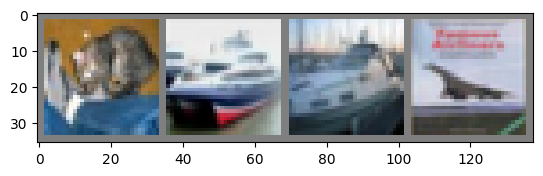

GroundTruth:    cat  ship  ship plane


In [12]:
# Obtenir le prochain lot d'images et d'étiquettes à partir du chargeur de données de test
images, labels = next(iter(testloader))

# Afficher les images
imshow(torchvision.utils.make_grid(images))
# Afficher les étiquettes
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))


Next, let's load back in our saved model (note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so):


In [15]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Okay, now let us see what the neural network thinks these examples above are.

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:


In [16]:
outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat   car   car plane


Let us look at how the network performs on the whole dataset.

In [17]:
correct = 0
total = 0
with torch.no_grad():  # torch.no_grad for TESTING
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


That looks way better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:

In [18]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 58 %
Accuracy of   car : 76 %
Accuracy of  bird : 47 %
Accuracy of   cat : 38 %
Accuracy of  deer : 22 %
Accuracy of   dog : 38 %
Accuracy of  frog : 76 %
Accuracy of horse : 59 %
Accuracy of  ship : 59 %
Accuracy of truck : 67 %


Okay, so what next?

How do we run these neural networks on the GPU?

### Training on GPU
----------------
Just like how you transfer a Tensor onto the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:


In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cpu


The rest of this section assumes that ``device`` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

.. code:: python

    net.to(device)


Remember that you will have to send the inputs and targets at every step
to the GPU too:

.. code:: python

        inputs, labels = data[0].to(device), data[1].to(device)

Why dont I notice MASSIVE speedup compared to CPU? Because your network
is really small.

## This is the end of the Tutorial!

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images
